## Handwritten Digit Recognition - MNIST Dataset - CNN - Python/Keras

#### Objective

- Understand how CNN helps by implementing first with MLP and then moving onto CNN
- Get a idea about CNN implementation in Python / Keras

#### Gratitude

I am reading the book **'Deep Learning with Python' by Francois Chollet**. I sincerely express my gratitude to the author for the simplicity in explanation and explanation with code for MLP/CNN based solution for Handwritten Digit Recognition using MNIST dataset. 

I understood the code from the book and thought to write it myself in this notebook to build my understanding and intuition. I thought this way I can capture my inferences as I am reading the book and get an idea about how CNN works.

#### Key Design Considerations

This is a Multi-Class Classification problem (10 classes)
- Language: Python
- Deep Learning Package: Keras
- Dataset: MNIST dataset available with Keras
- Model: MLP, CNN

#### Key Results
MLP based solution
- Input (784x1 coumn vector) -> 1 hidden layer (512 neurons, relu) -> Output (10 classes, softmax)
- Training Accuracy = **~98.9%**
- Test Accuracy = **~97.9%**

#### Dataset

Load train and test datasets

In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels.shape

(60000,)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
test_labels.shape

(10000,)

We have following with us:

<br>**Training Set**
- 60000 images
- Each image is of the shape 28 x 28 (rows x columns)
- 60000 labels defining the digit that corresponds to the respective image

<br>**Test Set**
- 10000 images
- Each image is of the shape 28 x 28 (rows x columns)
- 10000 labels defining the digit that corresponds to the respective image

#### Dataset Visualization

Let us visualize the handwritten digit images and labels for 0th training sample. We can see that the 0th image shows a handwritten 5 and the 0th label has the value 5. 

In [7]:
import matplotlib.pyplot as plt

In [8]:
# running this once shows the plts in gray scale as default
# https://stackoverflow.com/questions/3823752/display-image-as-grayscale-using-matplotlib
plt.gray()

<Figure size 432x288 with 0 Axes>

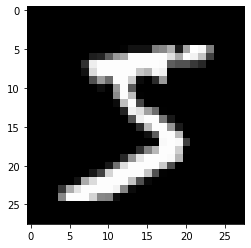

In [9]:
# if we do run the plt.gray() ... below code would have shown a color image
plt.imshow(train_images[0])

In [10]:
train_labels[0]

5

### MLP based solution

#### Define the model
- Input Shape: Column Vector corresponding to 28x28 image matrix for the digit = 784 rows,1 column = 784,1
- 1st hidden layer: Number of neurons = 512
- 1st hidden layer: Activation Function = relu (for non-linearity detection)
- Output layer: Number of neurons = 10 (corresponding to 0 to 9 digits)
- Output layer: Activation Function = softmax (to get probabilities for the repective 10 classes)

In [11]:
from keras import models

In [12]:
from keras import layers

In [13]:
model_mlp = models.Sequential()

In [14]:
model_mlp.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))

In [15]:
model_mlp.add(layers.Dense(10, activation='softmax'))

#### Define the optimizer function, loss function and metrics to be used for the model.
- Going ahead with the well known functions at this point in time
- Selected accuracy as the metrics to understand validation / test accuracy of the model

In [16]:
model_mlp.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#### We will preprocess the data before feeding it to the model: 
- Change the images to column vector form: 28x28 -> 784x1 to match to model's input expectations
- Change the vector values from int to float: to get continuos values as we move thro's model's layers 
- Scale the vector values to be in the [0,1] interval: model will see all samples with equal weightage as the range of values for all samples are same.

Note: gray scale values will be from 0 to 255... hence dividing the float by 255 will give us the values in [0,1] interval 

#### Data Preprocessing - Train Images

In [17]:
train_images.shape

(60000, 28, 28)

In [18]:
train_images_mlp = train_images.reshape(60000, 28*28)

In [19]:
train_images_mlp.shape

(60000, 784)

In [20]:
# type is an int
# chose a non-zero value element ... somewhere in the middle of the column vector
type(train_images_mlp[0][350])

numpy.uint8

In [21]:
train_images_mlp[0][350]

70

In [22]:
train_images_mlp = train_images_mlp.astype('float32') / 255

In [23]:
# type has changed to float 
type(train_images_mlp[0][350])

numpy.float32

In [24]:
train_images_mlp[0][350]

0.27450982

In [25]:
70/255

0.27450980392156865

#### Data Preprocessing - Test Images

In [26]:
test_images_mlp = test_images.reshape(10000,28*28)

In [27]:
test_images_mlp = test_images_mlp.astype('float32') / 255

#### We will process the data labels:\
- We have ten output classes ... consider it as a 10bit output
- We need to represent the label as a 10bit value where bit corresponding to the digit value will be 1 and rest all 9 bits will be 0
- Say label = 5. We will change it to a 10bit value as 0000010000 (note as the index starts at 0, 6th element corresponds to digit 5 and hence is 1 and rest are zero)

#### Data Preprocessing - Train Labels

In [28]:
train_labels[0]

5

In [29]:
from keras.utils import to_categorical

In [30]:
train_labels_mlp = to_categorical(train_labels)

In [31]:
train_labels_mlp[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

#### Data Preprocessing - Train Labels

In [32]:
test_labels_mlp = to_categorical(test_labels)

#### Model Trainng

We will now train the model using train images and train labels. 
- We will use a batch size = 120.
- 1 epoch = 60000 / 120 = 500 batches
- 1 epoch = 1 complete run of all train samples for training the model
- We will go for a total of 5 epochs = 5 complete run of the all train samples

In [33]:
model_mlp.fit(train_images_mlp, train_labels_mlp, epochs = 5, batch_size = 120)

Epoch 1/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.2529 - accuracy: 0.9271
Epoch 2/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.1030 - accuracy: 0.9690
Epoch 3/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.0686 - accuracy: 0.9794
Epoch 4/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.0495 - accuracy: 0.9852
Epoch 5/5
60000/60000 [==============================] - 5s 91us/step - loss: 0.0370 - accuracy: 0.9887


At this run, we got a training accuracy of **~98.9%**

#### Model Evaluation

We will now test model's performance with the test data.
- We predict the class for each of the 10000 test using the model.
- We will check the test accuracy.

In [34]:
test_loss, test_acc = model_mlp.evaluate(test_images_mlp, test_labels_mlp)

10000/10000 [==============================] - 1s 54us/step


In [35]:
print('test accuracy:', (test_acc*100))

test accuracy: 97.9099988937378


At this run, we got a training accuracy of **~97.9%**